# Lesson 4: Building a Multi-Document Agent

## Setup

In [1]:
from helper import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()

In [2]:
import nest_asyncio
nest_asyncio.apply()

## 1. Setup an agent over 3 papers

**Note**: The pdf files are included with this lesson. To access these papers, go to the `File` menu and select`Open...`.

In [3]:
urls = [
    "https://openreview.net/pdf?id=VtmBAGCN7o",
    "https://openreview.net/pdf?id=6PmJoRfdaK",
    "https://openreview.net/pdf?id=hSyW5go0v8",
]

papers = [
    "metagpt.pdf",
    "longlora.pdf",
    "selfrag.pdf",
]

In [4]:
from utils import get_doc_tools ## This will create vector index and summary tool for a given paper
from pathlib import Path

paper_to_tools_dict = {}
for paper in papers:
    print(f"Getting tools for paper: {paper}")
    vector_tool, summary_tool = get_doc_tools(paper, Path(paper).stem)
    paper_to_tools_dict[paper] = [vector_tool, summary_tool]
    
## For each paper , We will have vector tool and summary tool . It is store in dict

Getting tools for paper: metagpt.pdf
Getting tools for paper: longlora.pdf
Getting tools for paper: selfrag.pdf


In [6]:
print(paper_to_tools_dict)

{'metagpt.pdf': [<llama_index.core.tools.function_tool.FunctionTool object at 0x7fd002b244d0>, <llama_index.core.tools.query_engine.QueryEngineTool object at 0x7fd0021b3350>], 'longlora.pdf': [<llama_index.core.tools.function_tool.FunctionTool object at 0x7fd0015fb350>, <llama_index.core.tools.query_engine.QueryEngineTool object at 0x7fd0028ac3d0>], 'selfrag.pdf': [<llama_index.core.tools.function_tool.FunctionTool object at 0x7fd0027ffc50>, <llama_index.core.tools.query_engine.QueryEngineTool object at 0x7fd00283fbd0>]}


In [8]:
initial_tools = [t for paper in papers for t in paper_to_tools_dict[paper]]

In [9]:
from llama_index.llms.openai import OpenAI

llm = OpenAI(model="gpt-3.5-turbo")

In [10]:
len(initial_tools) ## 6 because . We have three paper and 2 tools each 

6

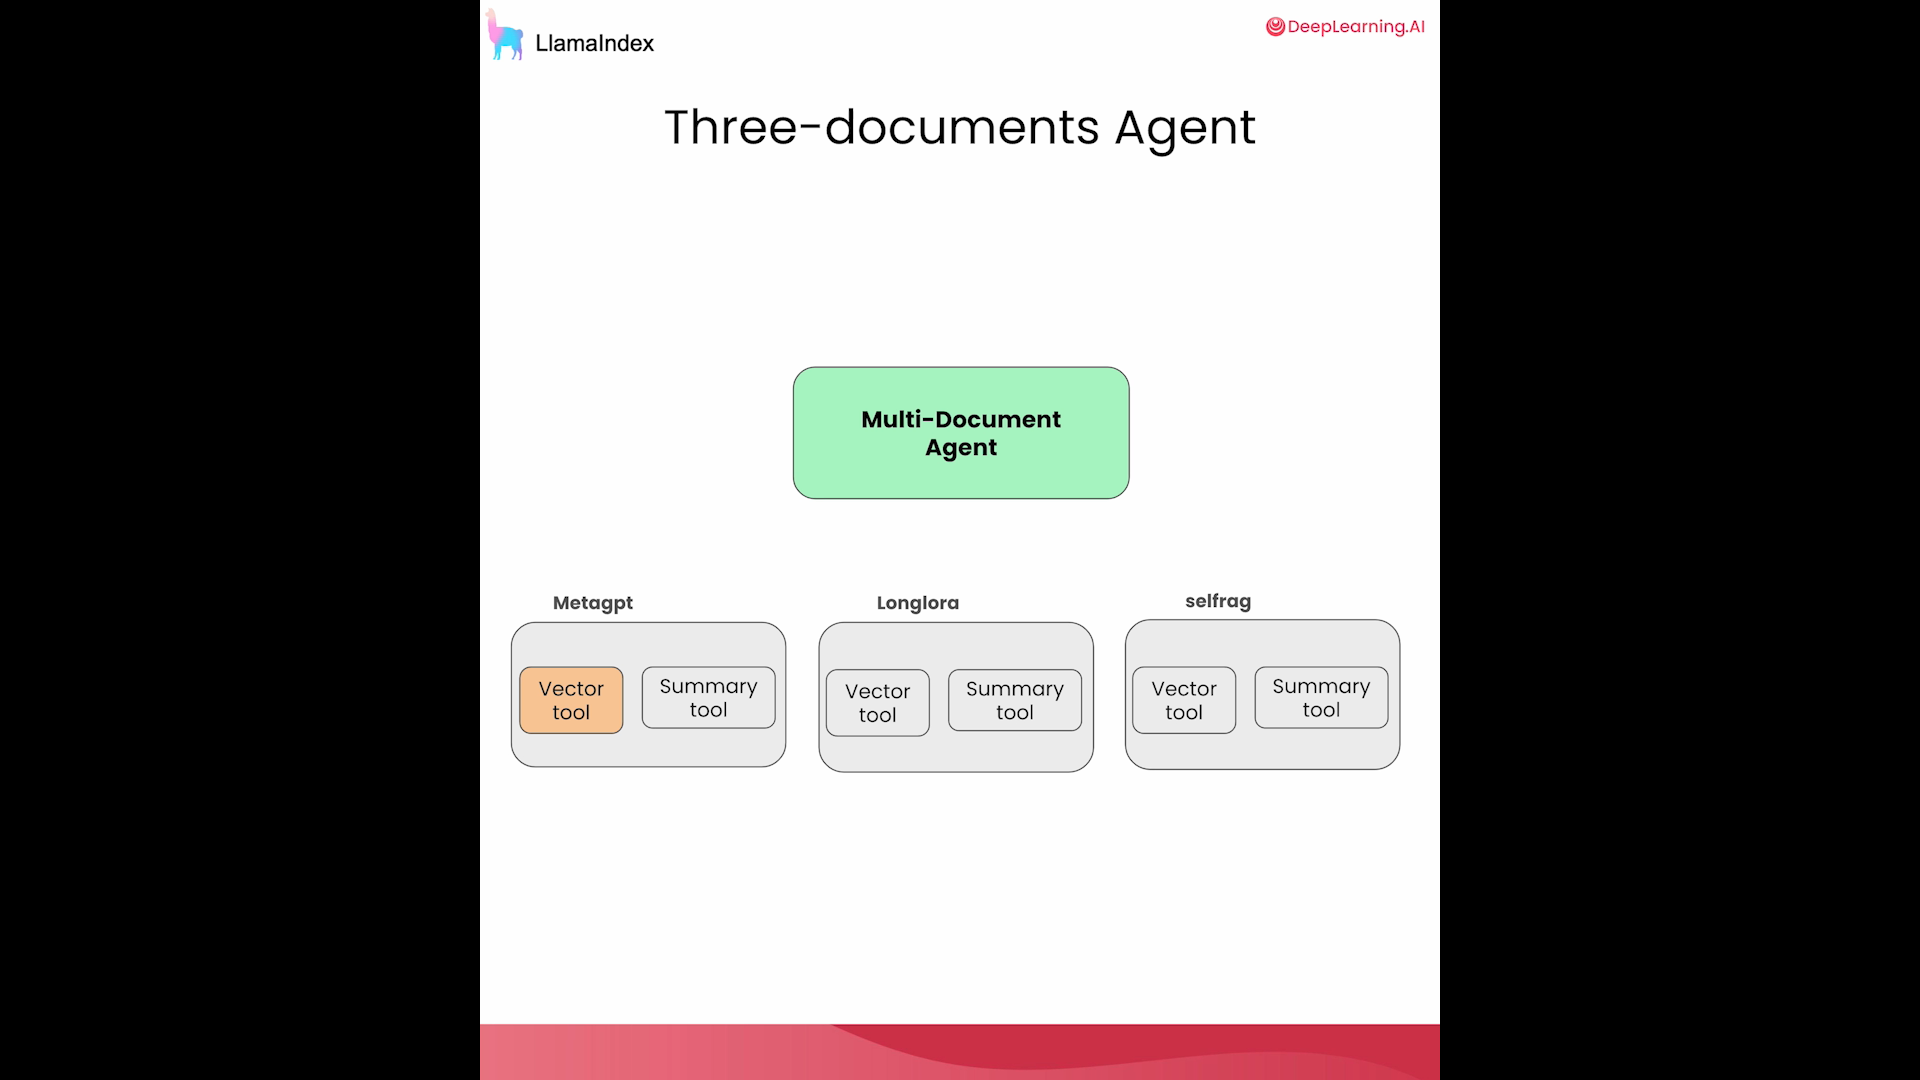

In [12]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    initial_tools, 
    llm=llm, 
    verbose=True
)
agent = AgentRunner(agent_worker)

In [13]:
response = agent.query(
    "Tell me about the evaluation dataset used in LongLoRA, "
    "and then tell me about the evaluation results"
)

Added user message to memory: Tell me about the evaluation dataset used in LongLoRA, and then tell me about the evaluation results
=== Calling Function ===
Calling function: vector_tool_longlora with args: {"query": "evaluation dataset"}
=== Function Output ===
PG19
=== Calling Function ===
Calling function: vector_tool_longlora with args: {"query": "evaluation results"}
=== Function Output ===
The evaluation results show that the models achieve better perplexity with longer context sizes. Increasing the context window size leads to improved perplexity values. Additionally, the models are fine-tuned on different context lengths, such as 100k, 65536, and 32768, and achieve promising results even on extremely large settings. However, there is some perplexity degradation observed on small context sizes for the extended models, which is a known limitation of Position Interpolation.
=== LLM Response ===
The evaluation dataset used in LongLoRA is not explicitly mentioned in the paper. 

Rega

In [14]:
response = agent.query("Give me a summary of both Self-RAG and LongLoRA")
print(str(response))

Added user message to memory: Give me a summary of both Self-RAG and LongLoRA
=== Calling Function ===
Calling function: summary_tool_selfrag with args: {"input": "Self-RAG"}
=== Function Output ===
Self-RAG is a framework that enhances the quality and factuality of a large language model through retrieval and self-reflection. It involves training a single arbitrary language model to adaptively retrieve passages on-demand, generate text informed by these passages, and reflect on both the retrieved passages and its own generations using special tokens called reflection tokens. By incorporating retrieval and self-reflection, Self-RAG aims to improve the generation quality and factuality of the language model without compromising its original creativity and versatility.
=== Calling Function ===
Calling function: summary_tool_longlora with args: {"input": "LongLoRA"}
=== Function Output ===
LongLoRA is an efficient method for extending the context length of Large Language Models (LLMs) whi

## 2. Setup an agent over 11 papers

### Download 11 ICLR papers

In [15]:
urls = [
    "https://openreview.net/pdf?id=VtmBAGCN7o",
    "https://openreview.net/pdf?id=6PmJoRfdaK",
    "https://openreview.net/pdf?id=LzPWWPAdY4",
    "https://openreview.net/pdf?id=VTF8yNQM66",
    "https://openreview.net/pdf?id=hSyW5go0v8",
    "https://openreview.net/pdf?id=9WD9KwssyT",
    "https://openreview.net/pdf?id=yV6fD7LYkF",
    "https://openreview.net/pdf?id=hnrB5YHoYu",
    "https://openreview.net/pdf?id=WbWtOYIzIK",
    "https://openreview.net/pdf?id=c5pwL0Soay",
    "https://openreview.net/pdf?id=TpD2aG1h0D"
]

papers = [
    "metagpt.pdf",
    "longlora.pdf",
    "loftq.pdf",
    "swebench.pdf",
    "selfrag.pdf",
    "zipformer.pdf",
    "values.pdf",
    "finetune_fair_diffusion.pdf",
    "knowledge_card.pdf",
    "metra.pdf",
    "vr_mcl.pdf"
]

To download these papers, below is the needed code:


    #for url, paper in zip(urls, papers):
         #!wget "{url}" -O "{paper}"
    
    
**Note**: The pdf files are included with this lesson. To access these papers, go to the `File` menu and select`Open...`.

In [16]:
from utils import get_doc_tools
from pathlib import Path

paper_to_tools_dict = {}
for paper in papers:
    print(f"Getting tools for paper: {paper}")
    vector_tool, summary_tool = get_doc_tools(paper, Path(paper).stem)
    paper_to_tools_dict[paper] = [vector_tool, summary_tool]

Getting tools for paper: metagpt.pdf
Getting tools for paper: longlora.pdf
Getting tools for paper: loftq.pdf
Getting tools for paper: swebench.pdf
Getting tools for paper: selfrag.pdf
Getting tools for paper: zipformer.pdf
Getting tools for paper: values.pdf
Getting tools for paper: finetune_fair_diffusion.pdf
Getting tools for paper: knowledge_card.pdf
Getting tools for paper: metra.pdf
Getting tools for paper: vr_mcl.pdf


### Extend the Agent with Tool Retrieval


Since if we use 11 pdfs . Then 22 tools will be created . Also context window will get increase .Instead we can use more advance agents for this task.

Solution here is - When user asks the query . We actually perform Retrival Augmentation . But not on the level of text.But actually on level of tools . 

We first retrieve small set of relevant toools . And feed relevant tools to agent reasoning prompt instead of all the tools.This retrieval process is similar to retrieval process used in RAG

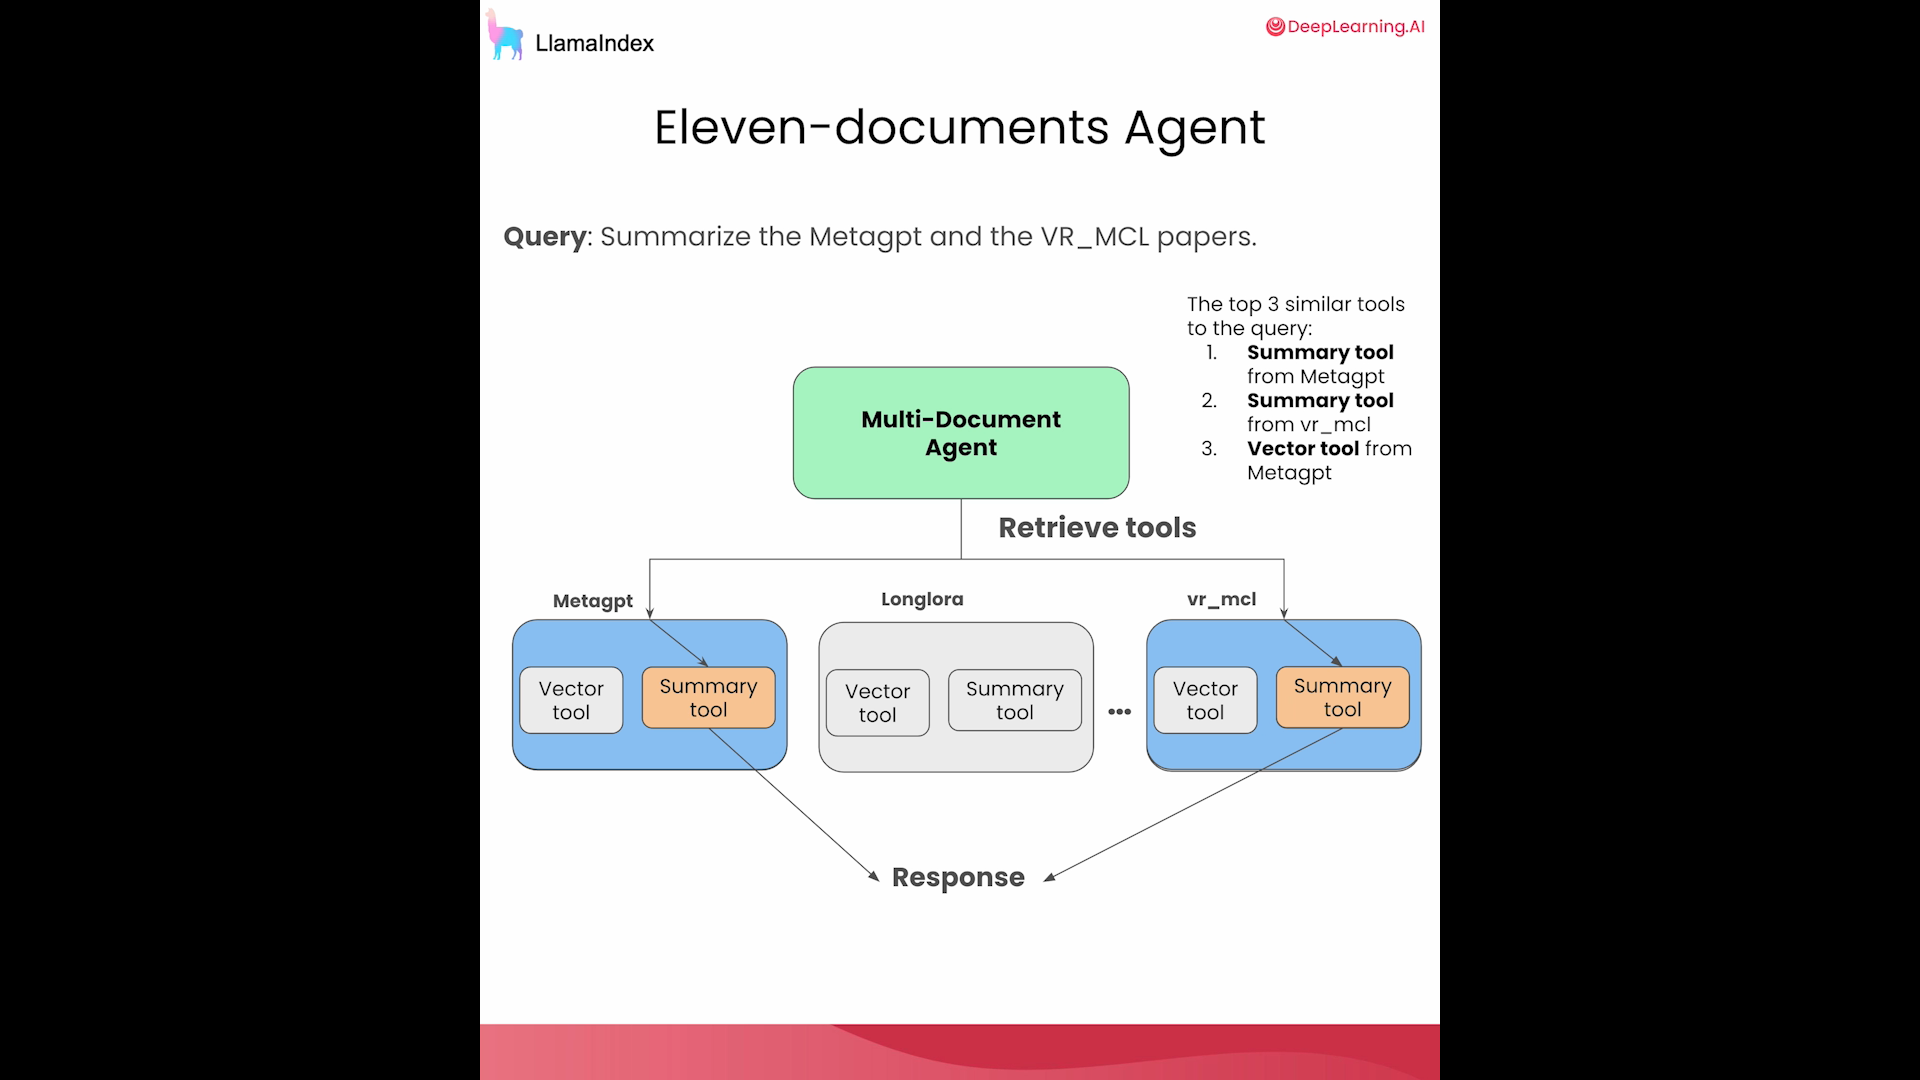

In [17]:
all_tools = [t for paper in papers for t in paper_to_tools_dict[paper]]

In [18]:
# define an "object" index and retriever over these tools
from llama_index.core import VectorStoreIndex
from llama_index.core.objects import ObjectIndex

### Vector Store Index is wrapped in Object Index

obj_index = ObjectIndex.from_objects(
    all_tools,
    index_cls=VectorStoreIndex,
)

In [21]:
### This wil return tools
obj_retriever = obj_index.as_retriever(similarity_top_k=3)

In [22]:
tools = obj_retriever.retrieve(
    "Tell me about the eval dataset used in MetaGPT and SWE-Bench"
)

In [25]:
tools[0].metadata

ToolMetadata(description='Useful for summarization questions related to metagpt', name='summary_tool_metagpt', fn_schema=<class 'llama_index.core.tools.types.DefaultToolFnSchema'>, return_direct=False)

In [24]:
tools[1].metadata

ToolMetadata(description='Useful for summarization questions related to metra', name='summary_tool_metra', fn_schema=<class 'llama_index.core.tools.types.DefaultToolFnSchema'>, return_direct=False)

In [23]:
tools[2].metadata

ToolMetadata(description='Useful for summarization questions related to swebench', name='summary_tool_swebench', fn_schema=<class 'llama_index.core.tools.types.DefaultToolFnSchema'>, return_direct=False)

In [26]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    tool_retriever=obj_retriever,
    llm=llm, 
    system_prompt=""" \
You are an agent designed to answer queries over a set of given papers.
Please always use the tools provided to answer a question. Do not rely on prior knowledge.\

""",
    verbose=True
)
agent = AgentRunner(agent_worker)

In [27]:
response = agent.query(
    "Tell me about the evaluation dataset used "
    "in MetaGPT and compare it against SWE-Bench"
)
print(str(response))

Added user message to memory: Tell me about the evaluation dataset used in MetaGPT and compare it against SWE-Bench
=== Calling Function ===
Calling function: summary_tool_metagpt with args: {"input": "evaluation dataset used in MetaGPT"}
=== Function Output ===
The evaluation dataset used in MetaGPT includes HumanEval, MBPP, and SoftwareDev.
=== Calling Function ===
Calling function: summary_tool_swebench with args: {"input": "evaluation dataset used in SWE-Bench"}
=== Function Output ===
The evaluation dataset used in SWE-Bench consists of task instances extracted from various open source repositories, including real GitHub issues and corresponding pull requests from popular Python repositories. It includes task instructions, issue text, retrieved files and documentation, example patch files, and prompts for generating patch files. The dataset is constructed by scraping pull requests from the top 100 packages of the top 5,000 most downloaded PyPI libraries, selecting merged pull requ

In [28]:
response = agent.query(
    "Compare and contrast the LoRA papers (LongLoRA, LoftQ). "
    "Analyze the approach in each paper first. "
)

Added user message to memory: Compare and contrast the LoRA papers (LongLoRA, LoftQ). Analyze the approach in each paper first. 
=== Calling Function ===
Calling function: summary_tool_longlora with args: {"input": "Approach in LongLoRA"}
=== Function Output ===
The approach in LongLoRA involves efficiently extending the context sizes of pre-trained large language models (LLMs) through the use of shifted sparse attention (S2-Attn) during fine-tuning. This method allows for context extension with significant computation savings while maintaining performance. LongLoRA also emphasizes parameter-efficient fine-tuning for context expansion, focusing on trainable embedding and normalization layers. By combining improved LoRA with S2-Attn, LongLoRA effectively extends the context window of LLMs while retaining their original architectures and compatibility with existing techniques like Flash-Attention2.
=== Calling Function ===
Calling function: summary_tool_loftq with args: {"input": "Approa